In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import ast
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import math

In [2]:
df=pd.read_csv("C:/Users/Imen/Documents/Emission_CO2/greenwashing/2016_Building_Energy_Benchmarking.csv", encoding='latin')

In [3]:
df.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [4]:
df.shape

(3376, 46)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [6]:
df.isnull().sum()

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                              16
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     8
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             9
LargestPropertyUseType               20
LargestPropertyUseTypeGFA            20
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697


In [7]:
df.duplicated().sum()

0

In [8]:
print(f"Description de la variable TotalGHGEmissions 2016 : \n\n",df['TotalGHGEmissions'].describe())

Description de la variable TotalGHGEmissions 2016 : 

 count     3367.000000
mean       119.723971
std        538.832227
min         -0.800000
25%          9.495000
50%         33.920000
75%         93.940000
max      16870.980000
Name: TotalGHGEmissions, dtype: float64


In [9]:
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [10]:
df = df[~df['BuildingType'].str.contains("Multifamily")]
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

In [11]:
print("Le jeu de données compte à présent {} lignes et {} colonnes.".format(df.shape[0],df.shape[1]))

Le jeu de données compte à présent 1668 lignes et 46 colonnes.


In [12]:
mean_columns = ['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
                'PropertyGFAParking', 'PropertyGFABuilding(s)',
                'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
                'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
                'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
                'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
                'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
                'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity']
OSEBuilding_means = df[['OSEBuildingID']+mean_columns].groupby('OSEBuildingID').mean()
OSEBuilding_means.head()

,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
1,1.0,12.0,88434.0,0.0,88434.0,88434.0,NaN,NaN,60.0,81.699997,...,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,249.98,2.83
2,1.0,11.0,103566.0,15064.0,88502.0,83880.0,15064.0,4622.0,61.0,94.800003,...,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,295.86,2.86
3,1.0,41.0,956110.0,196718.0,759392.0,756493.0,NaN,NaN,43.0,96.000000,...,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,2089.28,2.19
5,1.0,10.0,61320.0,0.0,61320.0,61320.0,NaN,NaN,56.0,110.800003,...,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,286.43,4.67
8,1.0,18.0,175580.0,62000.0,113580.0,123445.0,68009.0,0.0,75.0,114.800003,...,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,505.01,2.88


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1668 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1668 non-null   int64  
 1   DataYear                         1668 non-null   int64  
 2   BuildingType                     1668 non-null   object 
 3   PrimaryPropertyType              1668 non-null   object 
 4   PropertyName                     1668 non-null   object 
 5   Address                          1668 non-null   object 
 6   City                             1668 non-null   object 
 7   State                            1668 non-null   object 
 8   ZipCode                          1652 non-null   float64
 9   TaxParcelIdentificationNumber    1668 non-null   object 
 10  CouncilDistrictCode              1668 non-null   int64  
 11  Neighborhood                     1668 non-null   object 
 12  Latitude            

In [14]:
###Nous allons donc commencer par supprimer ces variables :
def search_componant(df, suffix=None):
  componant = []
  for col in df.columns:
      if suffix in col: 
        componant.append(col)
  return componant

In [15]:
#Suppression des variables WN
df.drop(search_componant(df,'WN'), axis=1, inplace=True)

In [16]:
#Suppression des variables redondantes
redundant_features = ['NaturalGas(therms)','Electricity(kWh)']
df.drop(redundant_features, axis=1, inplace=True)

In [17]:
df.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,1668.000000,1668.0,1652.000000,1668.000000,1668.000000,1668.000000,1668.000000,1666.000000,1668.000000,1.668000e+03,...,1094.000000,1665.000000,1666.000000,1.666000e+03,1.666000e+03,1.666000e+03,1.666000e+03,0.0,1666.000000,1666.000000
mean,16336.346523,2016.0,98116.819613,4.356715,47.616054,-122.332908,1961.913669,1.168667,4.121103,1.188427e+05,...,65.449726,72.158799,175.829892,8.437933e+06,5.125726e+05,5.843493e+06,1.970845e+06,NaN,184.973301,1.607845
std,13835.292512,0.0,18.430353,2.191048,0.048168,0.024580,32.741755,2.931409,6.563407,2.973622e+05,...,28.492928,74.048129,185.932121,3.024380e+07,5.513944e+06,2.079673e+07,9.370814e+06,NaN,751.976001,2.336882
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.411820,1900.000000,0.000000,0.000000,1.128500e+04,...,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,-1.154170e+05,0.000000e+00,NaN,-0.800000,-0.020000
25%,582.750000,2016.0,98105.000000,2.000000,47.585458,-122.343280,1930.000000,1.000000,1.000000,2.947775e+04,...,48.000000,33.700001,76.450001,1.229291e+06,0.000000e+00,7.213255e+05,0.000000e+00,NaN,19.967500,0.350000
50%,21143.500000,2016.0,98109.000000,4.000000,47.612340,-122.332935,1965.000000,1.000000,2.000000,4.928950e+04,...,73.000000,51.900002,130.949997,2.554947e+06,0.000000e+00,1.611881e+06,4.982630e+05,NaN,49.580000,0.880000
75%,24602.250000,2016.0,98125.000000,7.000000,47.649675,-122.321675,1989.000000,1.000000,4.000000,1.053250e+05,...,89.000000,81.699997,203.950001,6.913348e+06,0.000000e+00,4.847589e+06,1.520000e+06,NaN,142.382500,1.890000
max,50226.000000,2016.0,98199.000000,7.000000,47.733870,-122.258640,2015.000000,111.000000,99.000000,9.320156e+06,...,100.000000,834.400024,2620.000000,8.739237e+08,1.349435e+08,6.570744e+08,2.979090e+08,NaN,16870.980000,34.090000


In [18]:
df = df[~((df['SiteEnergyUse(kBtu)'].isnull()) | (df['TotalGHGEmissions'].isnull()))]

In [19]:
####La variable Comments, très peu renseignée également, peux être supprimée 
df.drop("Comments", axis=1, inplace=True)

In [20]:
df = df[~df["Outlier"].isnull()==False]
df.drop('Outlier', axis=1, inplace=True)

# 2. Analyse exploratoire & Feature Engineering

# 2.1. Les types de bâtiments

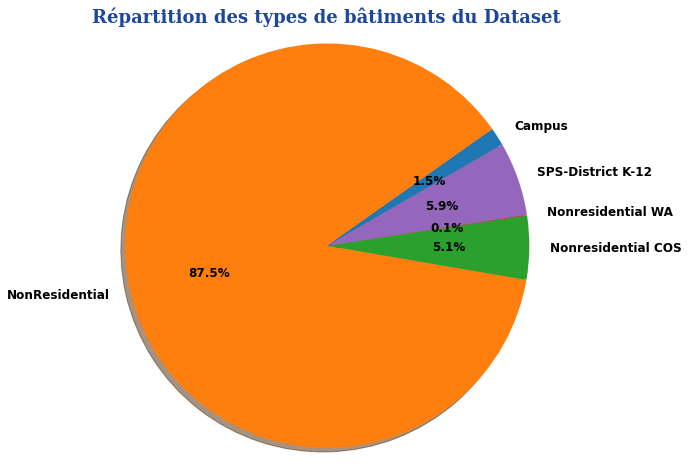

In [21]:
building_type = df.groupby(by='BuildingType')['OSEBuildingID'].nunique()

font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }

fig, ax = plt.subplots(figsize=(8,8))
ax.pie(building_type.values, labels=building_type.index, 
       autopct='%1.1f%%', shadow=True, startangle=30,
       textprops=dict(color="black",size=12, weight="bold"))
ax.axis('equal')
ax.set_title("Répartition des types de bâtiments du Dataset", fontdict=font_title)
plt.show()

In [22]:
df.loc[(df['BuildingType']=="NonResidential"),'PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    284
Other                          183
Warehouse                      180
Large Office                   165
Mixed Use Property             101
Retail Store                    89
Hotel                           75
Worship Facility                69
Distribution Center             51
Supermarket / Grocery Store     40
Medical Office                  38
K-12 School                     38
Self-Storage Facility           28
Residence Hall                  21
Senior Care Community           20
University                      17
Refrigerated Warehouse          12
Restaurant                      11
Hospital                        10
Laboratory                      10
Low-Rise Multifamily             1
Name: PrimaryPropertyType, dtype: int64

In [23]:
import re
regex = re.compile(r'[\n\r\t]')
df['PrimaryPropertyType'] = [regex.sub("", item) for index, item in df.PrimaryPropertyType.iteritems()]
df.loc[(df['BuildingType']=="NonResidential"),'PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    284
Other                          183
Warehouse                      180
Large Office                   165
Mixed Use Property             101
Retail Store                    89
Hotel                           75
Worship Facility                69
Distribution Center             51
Supermarket / Grocery Store     40
Medical Office                  38
K-12 School                     38
Self-Storage Facility           28
Residence Hall                  21
Senior Care Community           20
University                      17
Refrigerated Warehouse          12
Restaurant                      11
Hospital                        10
Laboratory                      10
Low-Rise Multifamily             1
Name: PrimaryPropertyType, dtype: int64

# 2.2. Les années de construction

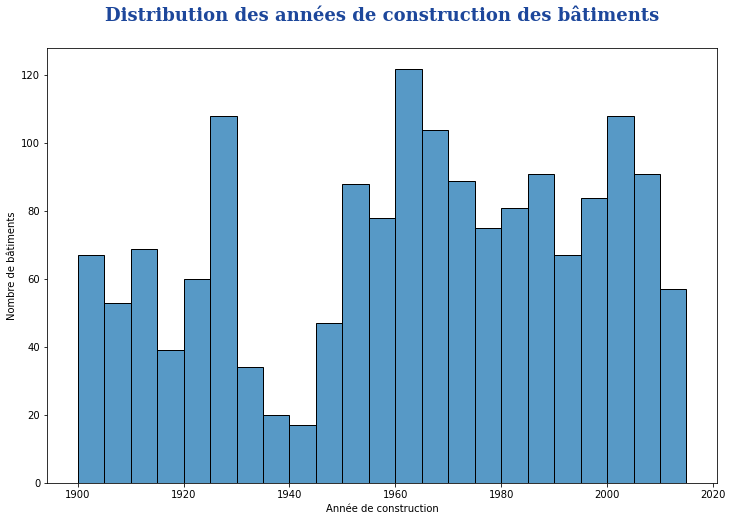

In [24]:
###"Nous allons regarder les distribution des années de construction des bâtiments de Seattle :
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=df, x='YearBuilt', bins=int((df.YearBuilt.max() - df.YearBuilt.min())/5))
ax.set_xlabel("Année de construction")
ax.set_ylabel("Nombre de bâtiments")
plt.title(f"Distribution des années de construction des bâtiments\n", fontdict=font_title)
plt.show()

In [25]:
df['BuildingAge'] = df['DataYear'] - df['YearBuilt']
df.drop('YearBuilt', axis=1, inplace=True)

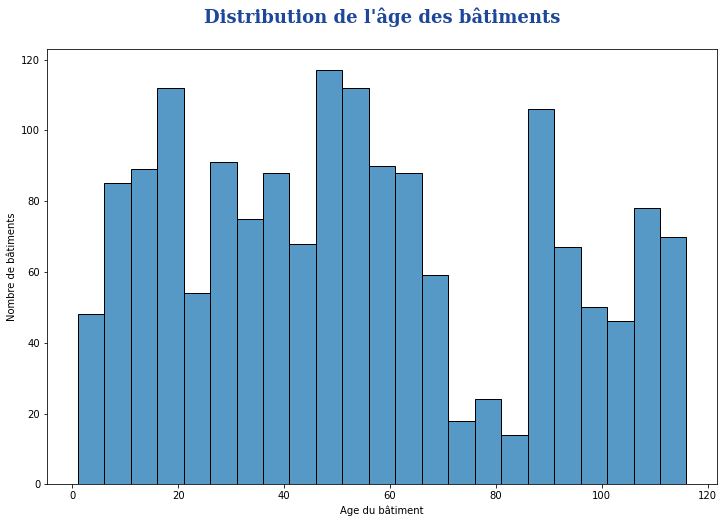

In [26]:

fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=df, x='BuildingAge', bins=int((df.BuildingAge.max() - df.BuildingAge.min())/5))
ax.set_xlabel("Age du bâtiment")
ax.set_ylabel("Nombre de bâtiments")
plt.title(f"Distribution de l'âge des bâtiments\n", fontdict=font_title)
plt.show()

# 2.3. Les corrélations linéaires

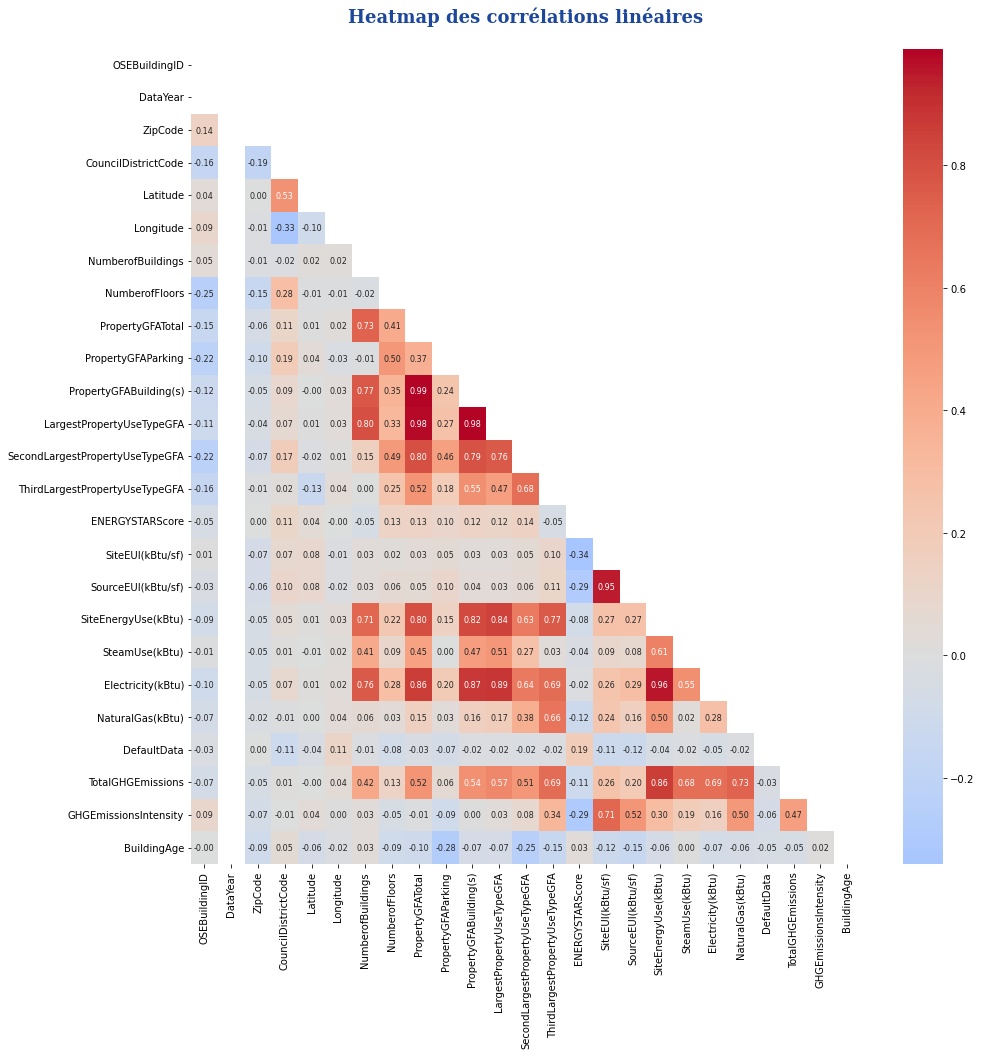

In [27]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={'size':8}, 
                 mask=mask, center=0, cmap="coolwarm")
plt.title(f"Heatmap des corrélations linéaires\n", 
          fontdict=font_title)
plt.show()

In [28]:
threshold = 0.7
corr_pairs = corr.unstack().sort_values(kind="quicksort")
strong_corr = (pd.DataFrame(corr_pairs[(abs(corr_pairs) > threshold)])
               .reset_index().rename(columns={0:'corr_coeff'}))
strong_corr = strong_corr[(strong_corr.index%2 == 0) & (strong_corr['level_0'] != strong_corr['level_1'])]
strong_corr.sort_values('corr_coeff', ascending=False)

,level_0,level_1,corr_coeff
44,PropertyGFATotal,PropertyGFABuilding(s),0.990453
42,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,0.982248
40,PropertyGFATotal,LargestPropertyUseTypeGFA,0.977669
38,Electricity(kBtu),SiteEnergyUse(kBtu),0.956330
36,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),0.947424
34,Electricity(kBtu),LargestPropertyUseTypeGFA,0.885196
32,Electricity(kBtu),PropertyGFABuilding(s),0.872658
30,PropertyGFATotal,Electricity(kBtu),0.862553
28,SiteEnergyUse(kBtu),TotalGHGEmissions,0.860154
26,SiteEnergyUse(kBtu),LargestPropertyUseTypeGFA,0.842337


In [29]:
def split_words(df, column = None):
  list_words = set()
  for word in df[column].str.split(','):
    if isinstance(word, float):
      continue
    list_words = set().union(word, list_words)
  return list(list_words)

list_use_type = split_words(df, 'ListOfAllPropertyUseTypes')
print("Nombre de type d'usages dans la base : {}".format(len(list_use_type)))

Nombre de type d'usages dans la base : 116


In [30]:
df['TotalUseTypeNumber'] = [str(word).count(",") + 1 for word in df['ListOfAllPropertyUseTypes'].str.split(',')]
df.drop('ListOfAllPropertyUseTypes', axis=1, inplace=True)

In [31]:
gfa_features = search_componant(df, suffix='GFA')
df[['TotalUseTypeNumber'] + gfa_features].head(10)

,TotalUseTypeNumber,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA
0,1,88434,0,88434,88434.0,NaN,NaN
1,3,103566,15064,88502,83880.0,15064.0,4622.0
2,1,956110,196718,759392,756493.0,NaN,NaN
3,1,61320,0,61320,61320.0,NaN,NaN
4,3,175580,62000,113580,123445.0,68009.0,0.0
5,1,97288,37198,60090,88830.0,NaN,NaN
6,1,83008,0,83008,81352.0,NaN,NaN
7,1,102761,0,102761,102761.0,NaN,NaN
8,1,163984,0,163984,163984.0,NaN,NaN
10,1,153163,19279,133884,133884.0,NaN,NaN


In [32]:
#On calcule les ratios
df['GFABuildingRate'] = (round((df['PropertyGFABuilding(s)'].fillna(0)
                                  /df['PropertyGFATotal'].fillna(0)),5))
df['GFAParkingRate'] = (round((df['PropertyGFAParking'].fillna(0)
                                 /df['PropertyGFATotal'].fillna(0)),5))

#On supprime les variables inutiles
df.drop(['LargestPropertyUseTypeGFA', 
           'SecondLargestPropertyUseTypeGFA',
           'SecondLargestPropertyUseType',
           'ThirdLargestPropertyUseTypeGFA',
           'ThirdLargestPropertyUseType',
           'PropertyGFAParking',
           'PropertyGFABuilding(s)'],
         axis=1, inplace=True)

#On complète les usages de la partie la plus large
df['LargestPropertyUseType'] = df['LargestPropertyUseType'].fillna("Unknown")
df['NumberofFloors'] = df['NumberofFloors'].fillna(1)

In [33]:
#####Nous pouvons également calculer la surface moyenne par bâtiment et par étage
df['GFAPerBuilding'] = round((df['PropertyGFATotal'] / df['NumberofBuildings']),3)
df['GFAPerFloor'] = round((df['PropertyGFATotal'] / df['NumberofFloors']),3)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 3375
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   OSEBuildingID                  1649 non-null   int64  
 1   DataYear                       1649 non-null   int64  
 2   BuildingType                   1649 non-null   object 
 3   PrimaryPropertyType            1649 non-null   object 
 4   PropertyName                   1649 non-null   object 
 5   Address                        1649 non-null   object 
 6   City                           1649 non-null   object 
 7   State                          1649 non-null   object 
 8   ZipCode                        1633 non-null   float64
 9   TaxParcelIdentificationNumber  1649 non-null   object 
 10  CouncilDistrictCode            1649 non-null   int64  
 11  Neighborhood                   1649 non-null   object 
 12  Latitude                       1649 non-null   f

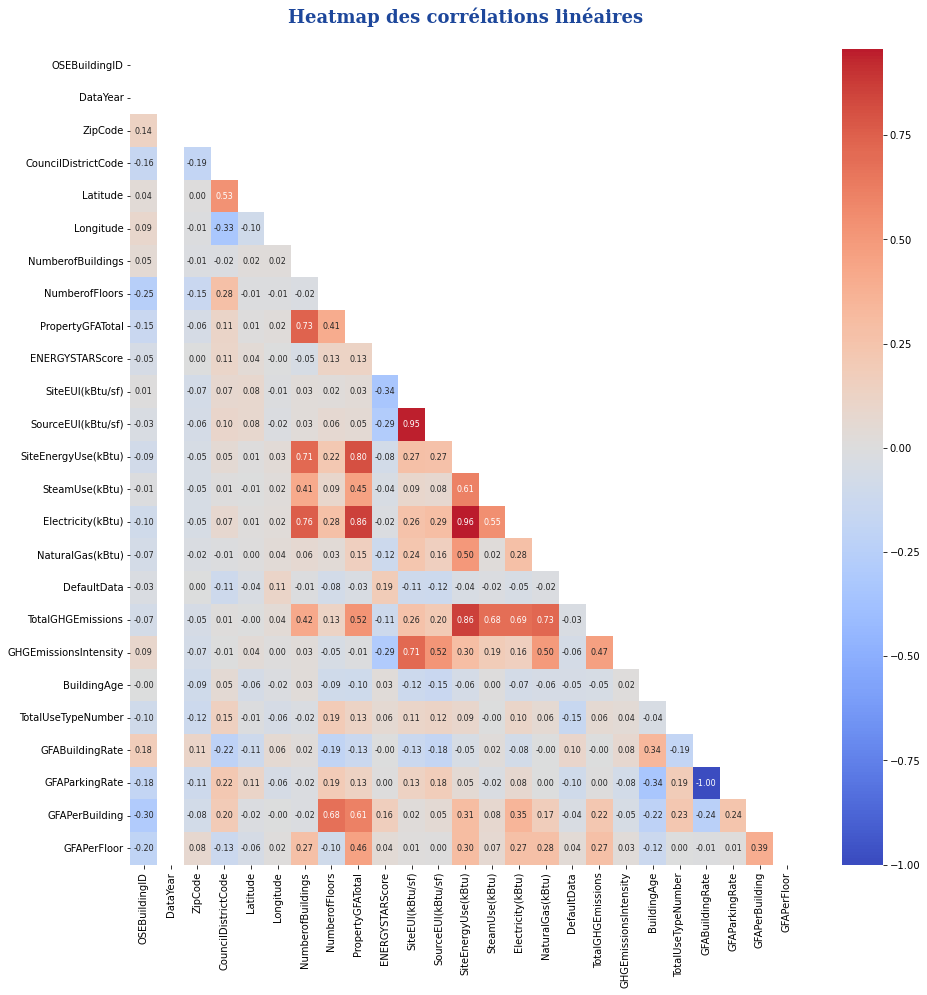

In [35]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={'size':8}, 
                 mask=mask, center=0, cmap="coolwarm")
plt.title(f"Heatmap des corrélations linéaires\n", 
          fontdict=font_title)
plt.show()

In [36]:
threshold = 0.7
corr_pairs = corr.unstack().sort_values(kind="quicksort")
strong_corr = (pd.DataFrame(corr_pairs[(abs(corr_pairs) > threshold)])
               .reset_index().rename(columns={0:'corr_coeff'}))
strong_corr = strong_corr[(strong_corr.index%2 == 0) & (strong_corr['level_0'] != strong_corr['level_1'])]
strong_corr.sort_values('corr_coeff', ascending=False)

,level_0,level_1,corr_coeff
20,SiteEnergyUse(kBtu),Electricity(kBtu),0.956330
18,SourceEUI(kBtu/sf),SiteEUI(kBtu/sf),0.947424
16,PropertyGFATotal,Electricity(kBtu),0.862553
14,TotalGHGEmissions,SiteEnergyUse(kBtu),0.860154
12,SiteEnergyUse(kBtu),PropertyGFATotal,0.804300
10,Electricity(kBtu),NumberofBuildings,0.759144
8,PropertyGFATotal,NumberofBuildings,0.734955
6,NaturalGas(kBtu),TotalGHGEmissions,0.725910
4,SiteEUI(kBtu/sf),GHGEmissionsIntensity,0.713950
2,NumberofBuildings,SiteEnergyUse(kBtu),0.713773


In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

strong_corr_features = list(set(list(strong_corr['level_0'].values) + list(strong_corr['level_1'].values)))
X = df[strong_corr_features].replace([np.inf, -np.inf], np.nan)
X = X.dropna()

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                   for i in range(len(X.columns))]
vif_data[vif_data['VIF'] > 5]

,feature,VIF
0,GHGEmissionsIntensity,6.658435
1,NumberofBuildings,5.574741
2,TotalGHGEmissions,55.230723
3,Electricity(kBtu),253.537143
4,SiteEUI(kBtu/sf),38.528534
5,NaturalGas(kBtu),7.488388
7,SourceEUI(kBtu/sf),27.372411
9,SiteEnergyUse(kBtu),536.841257
10,PropertyGFATotal,5.665098


In [38]:
Eui_features = search_componant(df, suffix='EUI(kBtu/sf)') + ['GHGEmissionsIntensity']
df.drop(Eui_features, axis=1, inplace=True)

# 2.4. Analyse des variables à prédire

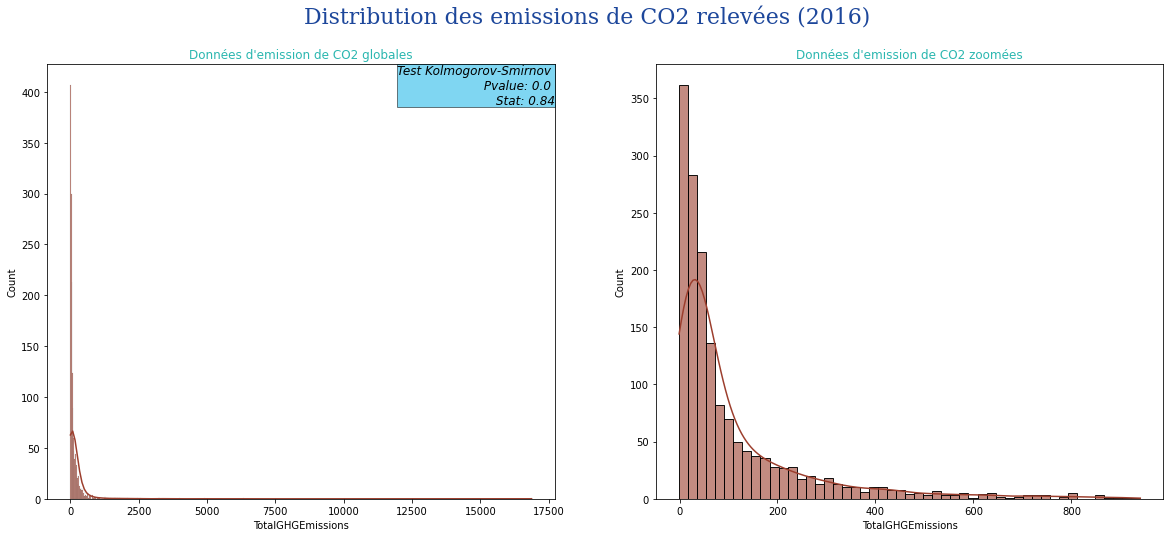

In [39]:
import scipy.stats as stats

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
left, width = 0, 1
bottom, height = 0, 1
right = left + width
top = bottom + height

sns.histplot(data=df, x="TotalGHGEmissions", kde=True, ax=axes[0], color="#9C3E2D", alpha=0.6)
axes[0].set_title("Données d'emission de CO2 globales", color='#2cb7b0')

#Test de Kolmogorov-Smirnov
kstest = stats.kstest(df['TotalGHGEmissions'].notnull(),'norm')
axes[0].text(right, top, 'Test Kolmogorov-Smirnov \n Pvalue: {:.2} \n Stat: {:.2}'.format(kstest.pvalue, kstest.statistic),
            horizontalalignment='right',
            verticalalignment='top',
            style='italic', transform=axes[0].transAxes, fontsize = 12,
            bbox={'facecolor':'#00afe6', 'alpha':0.5, 'pad':0})

sns.histplot(data=df[(df['TotalGHGEmissions']< 1000)], x="TotalGHGEmissions", kde=True, ax=axes[1], color="#9C3E2D", alpha=0.6)
axes[1].set_title("Données d'emission de CO2 zoomées", color='#2cb7b0')

plt.suptitle("Distribution des emissions de CO2 relevées (2016)", 
             fontdict=font_title, fontsize=22)
plt.show()

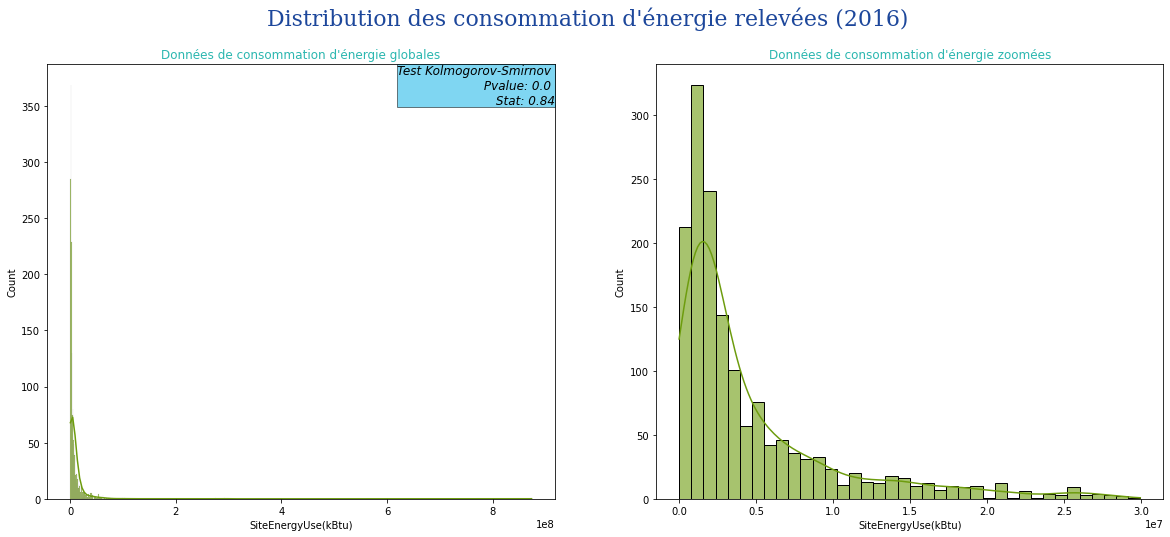

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))

sns.histplot(data=df, x="SiteEnergyUse(kBtu)", kde=True, ax=axes[0], color="#6D9C0E", alpha=0.6)
axes[0].set_title("Données de consommation d'énergie globales", color='#2cb7b0')

#Test de Kolmogorov-Smirnov
kstest = stats.kstest(df['SiteEnergyUse(kBtu)'].notnull(),'norm')
axes[0].text(right, top, 'Test Kolmogorov-Smirnov \n Pvalue: {:.2} \n Stat: {:.2}'.format(kstest.pvalue, kstest.statistic),
            horizontalalignment='right',
            verticalalignment='top',
            style='italic', transform=axes[0].transAxes, fontsize = 12,
            bbox={'facecolor':'#00afe6', 'alpha':0.5, 'pad':0})

sns.histplot(data=df[(df['SiteEnergyUse(kBtu)']< 0.3*10**8)], x="SiteEnergyUse(kBtu)", kde=True, ax=axes[1], color="#6D9C0E", alpha=0.6)
axes[1].set_title("Données de consommation d'énergie zoomées", color='#2cb7b0')

plt.suptitle("Distribution des consommation d'énergie relevées (2016)", 
             fontdict=font_title, fontsize=22)
plt.show()

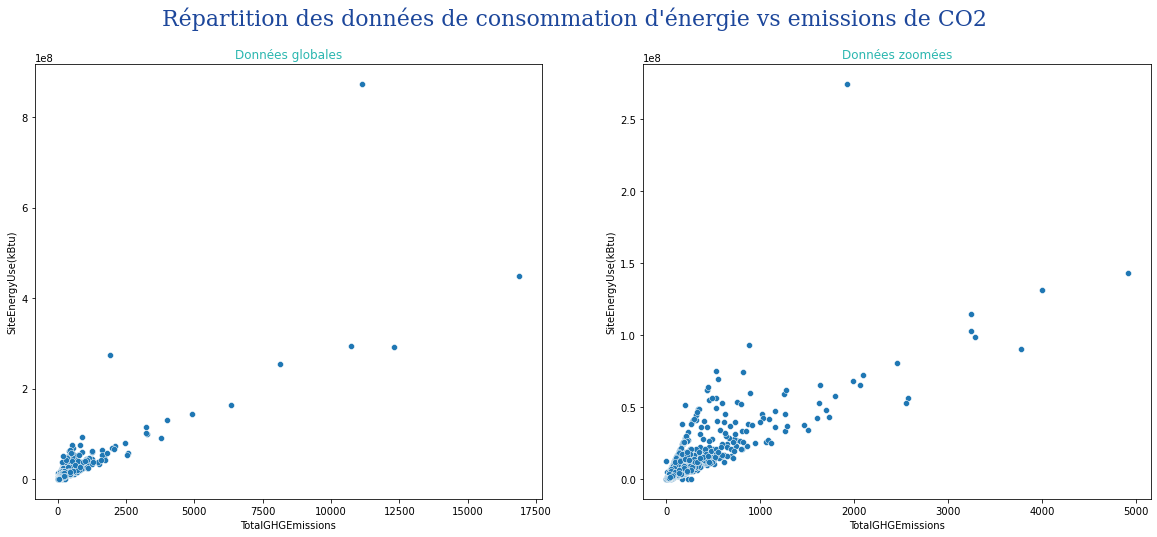

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.scatterplot(data=df, x="TotalGHGEmissions", y="SiteEnergyUse(kBtu)", ax=axes[0])
axes[0].set_title("Données globales", color='#2cb7b0')
sns.scatterplot(data=df[(df['TotalGHGEmissions'] < 5000)], x="TotalGHGEmissions", y="SiteEnergyUse(kBtu)", ax=axes[1])
axes[1].set_title("Données zoomées", color='#2cb7b0')
plt.suptitle("Répartition des données de consommation d'énergie vs emissions de CO2", fontdict=font_title, fontsize=22)
plt.show()

In [42]:
from math import radians, cos, sin, asin, sqrt

#Coordonnées du centre de Seattle
seattle_lat = 47.6062
seattle_lon = -122.3321

def haversine_distance(lat1, lng1, lat2, lng2, degrees=True):
    r = 3956 # rayon de la Terre en miles
    
    if degrees:
        lat1, lng1, lat2, lng2 = map(radians, [lat1, lng1, lat2, lng2])
    
    # Formule Haversine
    dlng = lng2 - lng1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlng/2)**2
    d = 2 * r * asin(sqrt(a))  

    return d

In [43]:
#Calcul des distance au centre de Seattle pour chaque point
df['harvesine_distance'] = [haversine_distance(seattle_lat, seattle_lon, x, y) 
                              for x, y in zip(df.Latitude.astype(float), df.Longitude.astype(float))]

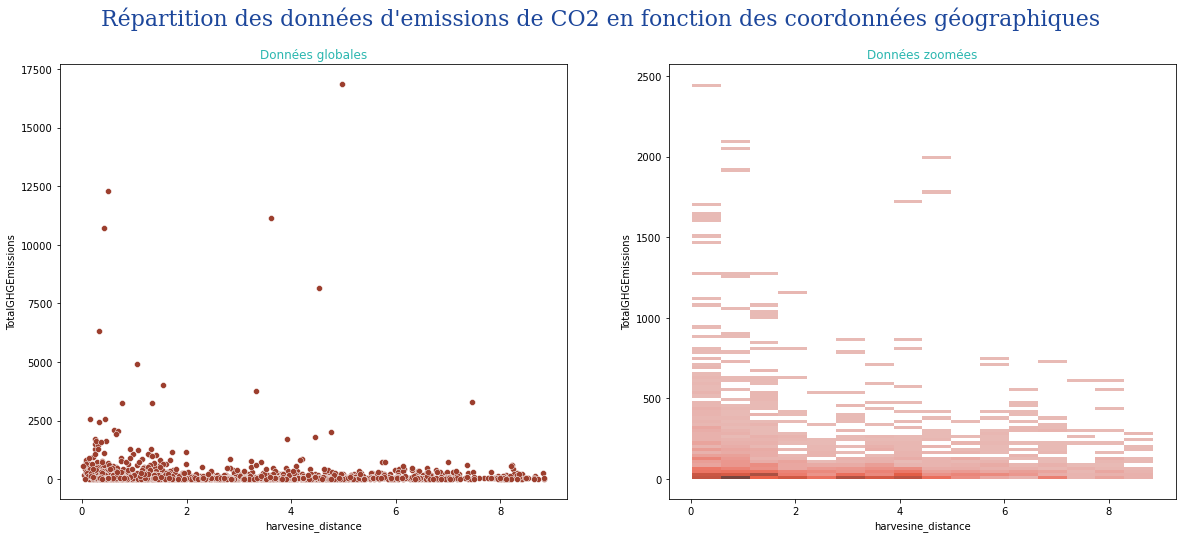

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.scatterplot(data=df, y="TotalGHGEmissions", x="harvesine_distance", color="#9C3E2D", ax=axes[0])
axes[0].set_title("Données globales", color='#2cb7b0')
sns.histplot(data=df[(df['TotalGHGEmissions'] < 2500)], y="TotalGHGEmissions", 
                x="harvesine_distance", color="#9C3E2D", ax=axes[1])
axes[1].set_title("Données zoomées", color='#2cb7b0')
plt.suptitle("Répartition des données d'emissions de CO2 en fonction des coordonnées géographiques", 
             fontdict=font_title, fontsize=22)
plt.show()

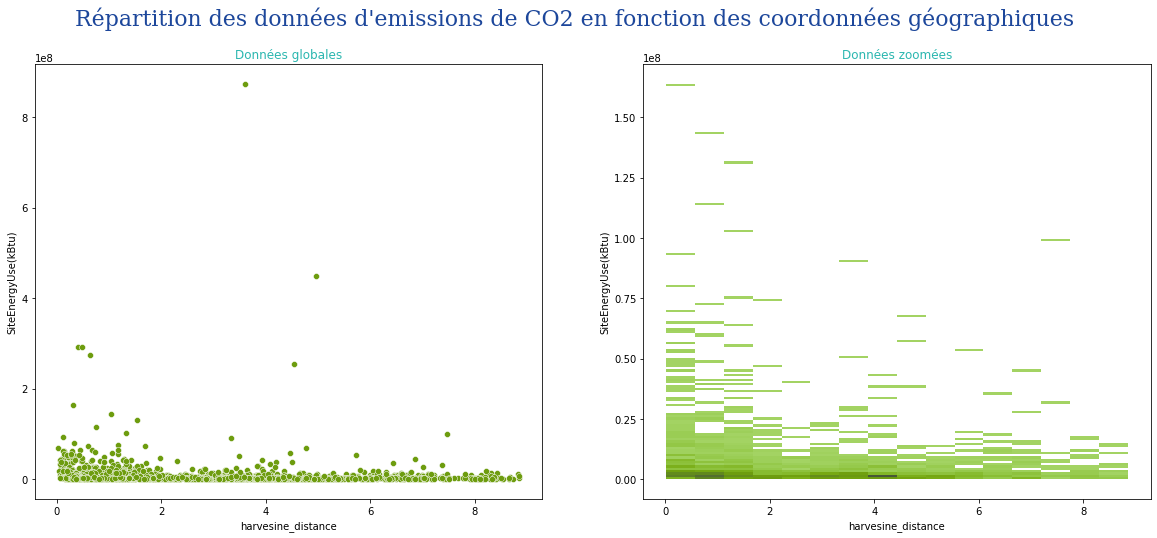

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.scatterplot(data=df, y="SiteEnergyUse(kBtu)", x="harvesine_distance", color="#6D9C0E", ax=axes[0])
axes[0].set_title("Données globales", color='#2cb7b0')
sns.histplot(data=df[(df['SiteEnergyUse(kBtu)'] < 2*10**8)], y="SiteEnergyUse(kBtu)", 
                x="harvesine_distance", color="#6D9C0E", ax=axes[1])
axes[1].set_title("Données zoomées", color='#2cb7b0')
plt.suptitle("Répartition des données d'emissions de CO2 en fonction des coordonnées géographiques", 
             fontdict=font_title, fontsize=22)
plt.show()

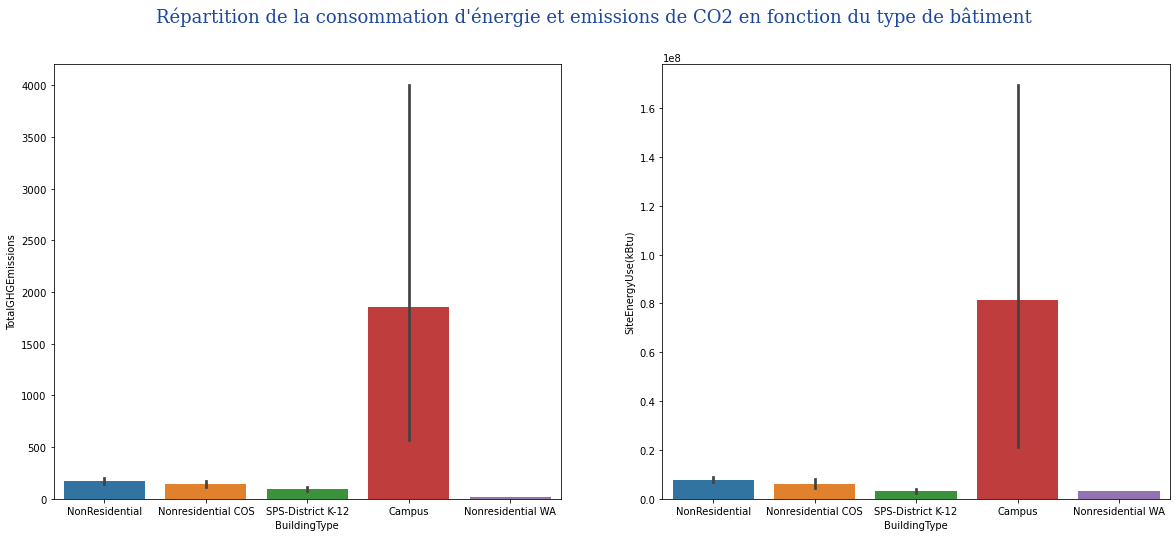

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.barplot(x='BuildingType',y='TotalGHGEmissions',data=df, ax=axes[0])
sns.barplot(x='BuildingType',y='SiteEnergyUse(kBtu)',data=df, ax=axes[1])
plt.suptitle("Répartition de la consommation d'énergie et emissions de CO2 en fonction du type de bâtiment", 
             fontdict=font_title, fontsize=18)
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

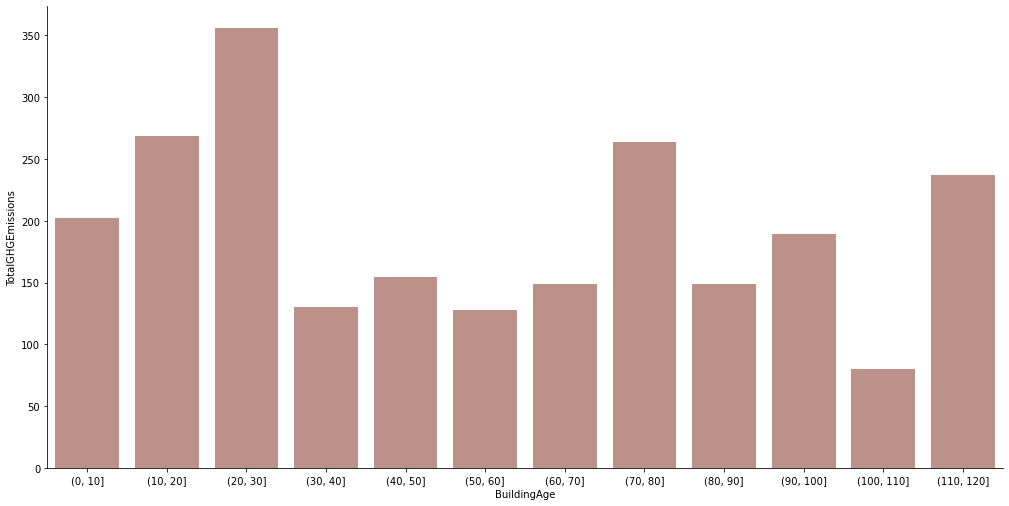

In [47]:
bins = pd.IntervalIndex.from_tuples([(0, 10), (10, 20), (20, 30), (30, 40), (40, 50), 
                                     (50, 60), (60, 70), (70,80), (80,90), (90,100), 
                                     (100,110), (110,120)])

sns.catplot(
    data=df, kind="bar",
    x=pd.cut(df['BuildingAge'], bins=bins), y="TotalGHGEmissions",
    ci=None, color="#9C3E2D", alpha=.6,
    height=7, aspect=2
)
plt.title("Influence de l'âge des bâtiments sur les émissions de CO2", fontdict=font_title)
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

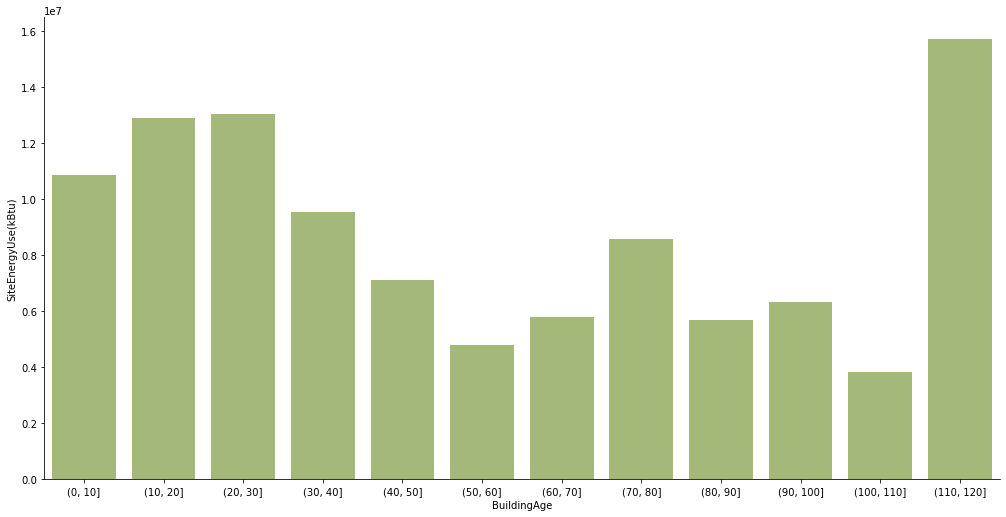

In [48]:
sns.catplot(
    data=df, kind="bar",
    x=pd.cut(df['BuildingAge'], bins=bins), y="SiteEnergyUse(kBtu)",
    ci=None, color="#6D9C0E", alpha=.6,
    height=7, aspect=2
)
plt.title("Influence de l'âge des bâtiments sur les consommations d'énergie", fontdict=font_title)
plt.show()

# 3. Dernières étapes de nettoyage

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 3375
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   OSEBuildingID                  1649 non-null   int64  
 1   DataYear                       1649 non-null   int64  
 2   BuildingType                   1649 non-null   object 
 3   PrimaryPropertyType            1649 non-null   object 
 4   PropertyName                   1649 non-null   object 
 5   Address                        1649 non-null   object 
 6   City                           1649 non-null   object 
 7   State                          1649 non-null   object 
 8   ZipCode                        1633 non-null   float64
 9   TaxParcelIdentificationNumber  1649 non-null   object 
 10  CouncilDistrictCode            1649 non-null   int64  
 11  Neighborhood                   1649 non-null   object 
 12  Latitude                       1649 non-null   f

In [50]:
df['ComplianceStatus'].unique()

array(['Compliant', 'Error - Correct Default Data', 'Missing Data',
       'Non-Compliant'], dtype=object)

In [51]:
print("Nombre de ligne identifiées comme non conforme : {}.".format(df[df['ComplianceStatus'] != "Compliant"].shape[0]))

Nombre de ligne identifiées comme non conforme : 101.


In [52]:
df = df[df['ComplianceStatus'] == "Compliant"]

In [53]:
df = df.drop(['DefaultData','ComplianceStatus', 'City',
                  'TaxParcelIdentificationNumber','CouncilDistrictCode'], axis=1)

# 4. Projection des établissements sur la carte de Seattle

In [54]:
import folium
import folium.plugins

seattle_map = folium.Map(location=[seattle_lat, seattle_lon], zoom_start=11)

#Clusters
marker_cluster = folium.plugins.MarkerCluster().add_to(seattle_map)
for lat, lng, in zip(df.Latitude, df.Longitude):
    folium.Marker(location=[lat, lng]).add_to(marker_cluster)

seattle_map

In [55]:
df = df.drop(['Latitude','Longitude'], axis=1)
df.set_index("OSEBuildingID").to_csv("building-energy-cleaned.csv")